In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Aviation_KPIs_Dataset.xlsx - Sheet1.csv")

In [3]:
df.head()

,Flight Number,Scheduled Departure Time,Actual Departure Time,Delay (Minutes),Aircraft Utilization (Hours/Day),Turnaround Time (Minutes),Load Factor (%),Fleet Availability (%),Maintenance Downtime (Hours),Fuel Efficiency (ASK),Revenue (USD),Operating Cost (USD),Net Profit Margin (%),Ancillary Revenue (USD),Debt-to-Equity Ratio,Revenue per ASK,Cost per ASK,Profit (USD)
0,FL885,2024-05-20 11:51:21,2024-07-10 02:38:54,50,12.36,115,79.18,96.24,9.21,4.15,10953.75,27847.59,17.90,1058.68,2.46,2639.46,6710.26,-16893.84
1,FL930,2024-01-23 06:56:23,2024-07-07 02:53:44,27,14.53,83,98.59,80.49,1.55,3.93,31597.25,1564.41,7.70,2941.32,2.89,8040.01,398.07,30032.84
2,FL478,2024-05-30 09:18:39,2024-12-05 01:00:54,108,10.73,87,67.44,97.90,2.06,4.26,13700.27,30494.88,5.84,1920.45,1.34,3216.03,7158.42,-16794.61
3,FL637,2024-08-15 05:21:47,2024-09-21 13:23:42,64,15.10,99,69.01,80.17,6.85,4.13,39913.01,13444.09,24.09,3167.79,0.60,9664.17,3255.23,26468.92
4,FL318,2024-07-25 15:29:58,2024-03-21 15:05:54,30,13.46,114,50.36,82.23,7.30,4.97,11531.48,34668.98,7.18,619.80,0.84,2320.22,6975.65,-23137.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 18 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Flight Number                     200000 non-null  object 
 1   Scheduled Departure Time          200000 non-null  object 
 2   Actual Departure Time             200000 non-null  object 
 3   Delay (Minutes)                   200000 non-null  int64  
 4   Aircraft Utilization (Hours/Day)  200000 non-null  float64
 5   Turnaround Time (Minutes)         200000 non-null  int64  
 6   Load Factor (%)                   200000 non-null  float64
 7   Fleet Availability (%)            200000 non-null  float64
 8   Maintenance Downtime (Hours)      200000 non-null  float64
 9   Fuel Efficiency (ASK)             200000 non-null  float64
 10  Revenue (USD)                     200000 non-null  float64
 11  Operating Cost (USD)              200000 non-null  f

In [5]:
data_types = df.dtypes
data_types

Flight Number                        object
Scheduled Departure Time             object
Actual Departure Time                object
Delay (Minutes)                       int64
Aircraft Utilization (Hours/Day)    float64
Turnaround Time (Minutes)             int64
Load Factor (%)                     float64
Fleet Availability (%)              float64
Maintenance Downtime (Hours)        float64
Fuel Efficiency (ASK)               float64
Revenue (USD)                       float64
Operating Cost (USD)                float64
Net Profit Margin (%)               float64
Ancillary Revenue (USD)             float64
Debt-to-Equity Ratio                float64
Revenue per ASK                     float64
Cost per ASK                        float64
Profit (USD)                        float64
dtype: object

In [6]:
missing_values_full = df.isnull().sum()
missing_values_full[missing_values_full > 0]

Series([], dtype: int64)

In [7]:
df.drop(columns=["Scheduled Departure Time", "Actual Departure Time"], inplace=True)

In [8]:
# Encode 'Flight Number' as categorical
df["Flight Number"] = df["Flight Number"].astype("category").cat.codes

In [9]:
# Identify non-numeric values in numeric columns
non_numeric_counts = {}

for col in df.columns:
    # Check if conversion to numeric fails
    non_numeric_counts[col] = df[col].apply(lambda x: isinstance(x, str)).sum()

# Display columns with non-numeric values
{col: count for col, count in non_numeric_counts.items() if count > 0}


{}

In [10]:
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute IQR for numerical columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers in each column
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).sum()

# Display columns with significant outliers
outliers[outliers > 0]

Revenue per ASK    1544
Cost per ASK       1555
dtype: int64

In [11]:
# # Extract features from Scheduled Departure Time
# df["Scheduled Month"] = df["Scheduled Departure Time"].dt.month
# df["Scheduled Day"] = df["Scheduled Departure Time"].dt.day
# df["Scheduled Hour"] = df["Scheduled Departure Time"].dt.hour

# # Extract features from Actual Departure Time
# df["Actual Month"] = df["Actual Departure Time"].dt.month
# df["Actual Day"] = df["Actual Departure Time"].dt.day
# df["Actual Hour"] = df["Actual Departure Time"].dt.hour

In [12]:
# Check for duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [13]:
# Save cleaned dataset
df.to_csv("Cleaned_Aviation_KPIs_Dataset.csv", index=False)
print("Dataset cleaned and saved successfully!")

Dataset cleaned and saved successfully!


In [14]:
# Remove rows where numeric values are outliers
df_cleaned = df[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

# Check the new shape of the dataset after outlier removal
df_cleaned.shape

(197069, 16)

In [15]:
# List of numerical features to check for outliers
num_features = ["Profit (USD)", "Revenue (USD)", "Operating Cost (USD)", "Load Factor (%)", "Fuel Efficiency (ASK)"]

# Compute Z-scores for numerical features
z_scores = df_cleaned[num_features].apply(zscore)

array([[<Axes: title={'center': 'Profit (USD)'}>,
        <Axes: title={'center': 'Revenue (USD)'}>,
        <Axes: title={'center': 'Operating Cost (USD)'}>],
       [<Axes: title={'center': 'Load Factor (%)'}>,
        <Axes: title={'center': 'Fuel Efficiency (ASK)'}>, <Axes: >]],
      dtype=object)

<Figure size 1200x600 with 0 Axes>

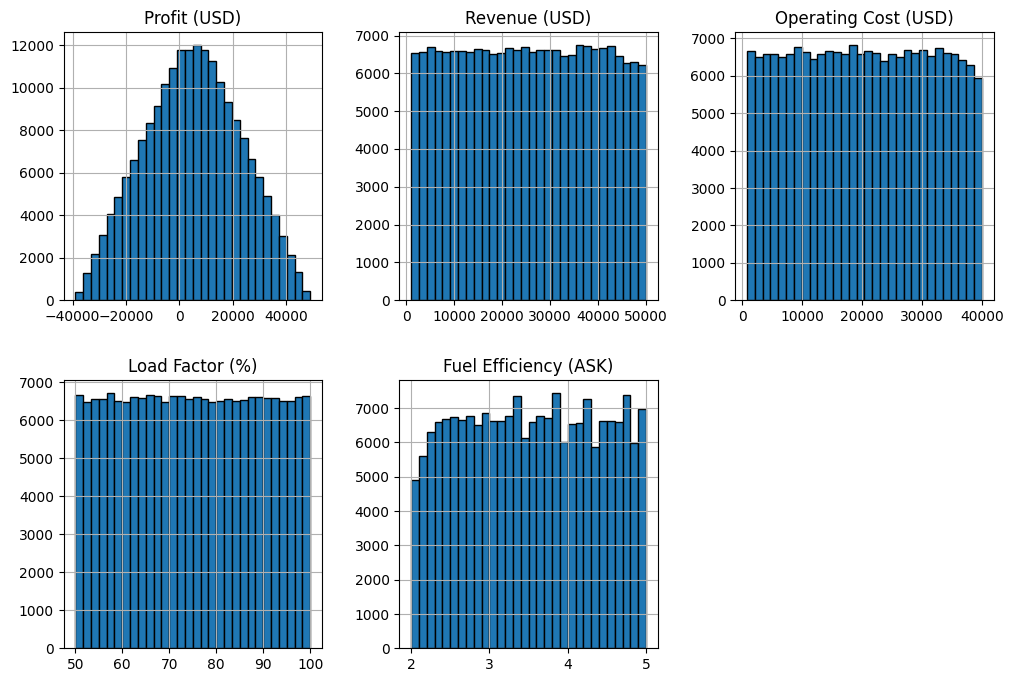

In [16]:
plt.figure(figsize=(12, 6))

# Plot histograms for key numerical features
df_cleaned[["Profit (USD)", "Revenue (USD)", "Operating Cost (USD)", "Load Factor (%)", "Fuel Efficiency (ASK)"]].hist(bins=30, figsize=(12, 8), layout=(2, 3), edgecolor='black')

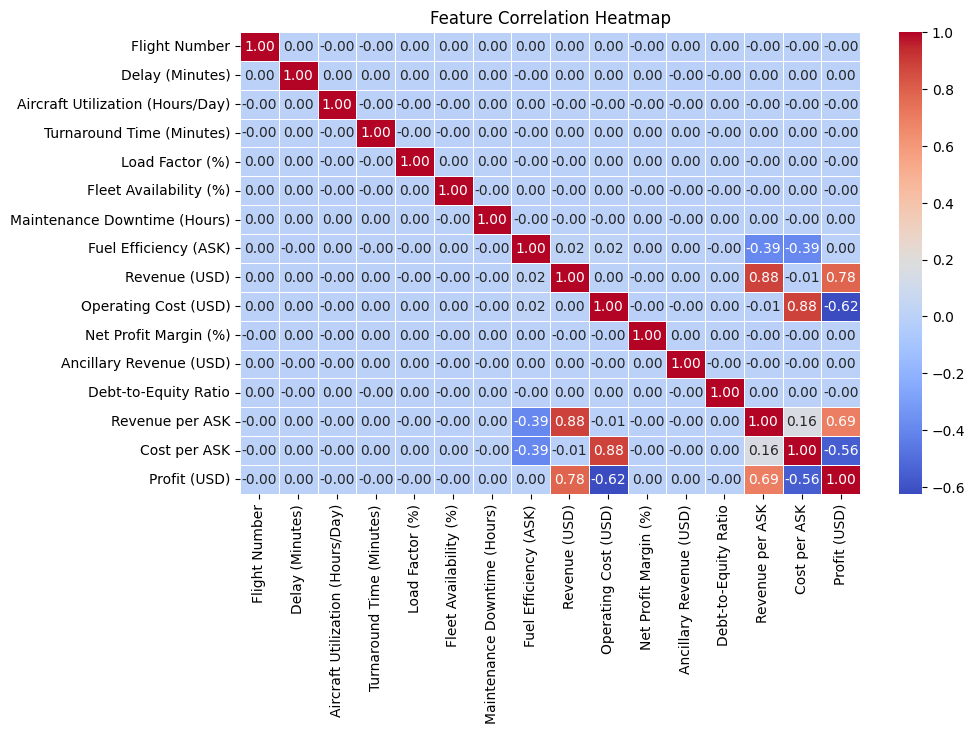

In [17]:
# Select only numeric columns
numeric_df = df_cleaned.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Engineering

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
# Step 3: Drop DateTime Columns
datetime_cols = df_cleaned.select_dtypes(include=['datetime64']).columns
df_cleaned = df_cleaned.drop(columns=datetime_cols)

In [21]:
# Step 3: Encode Categorical Variables
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

In [22]:
for col in categorical_cols:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

In [23]:
# Step 4: Define Features and Target
X = df_cleaned.drop(columns=["Profit (USD)"])  # Drop target column
y = df_cleaned["Profit (USD)"]

In [24]:
# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Step 6: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Step 8: Train and Evaluate Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),  # Parallel Processing
    "XGBoost": XGBRegressor(n_estimators=50, tree_method='hist', random_state=42)  # Faster XGBoost
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Compute Metrics
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred),
        "R² Score": r2_score(y_test, y_pred)
    }

# Display Best Model
best_model = max(results, key=lambda k: results[k]["R² Score"])
print(f"Best Model: {best_model}")
print(results)

Best Model: Linear Regression
{'Linear Regression': {'MAE': 2.5786093258620955e-11, 'RMSE': 1.0098673220185128e-21, 'R² Score': 1.0}, 'Random Forest': {'MAE': 44.55231294463897, 'RMSE': 3338.0050941915465, 'R² Score': 0.9999896961693554}, 'XGBoost': {'MAE': 226.53248684875612, 'RMSE': 84758.3063857873, 'R² Score': 0.9997383661168642}}


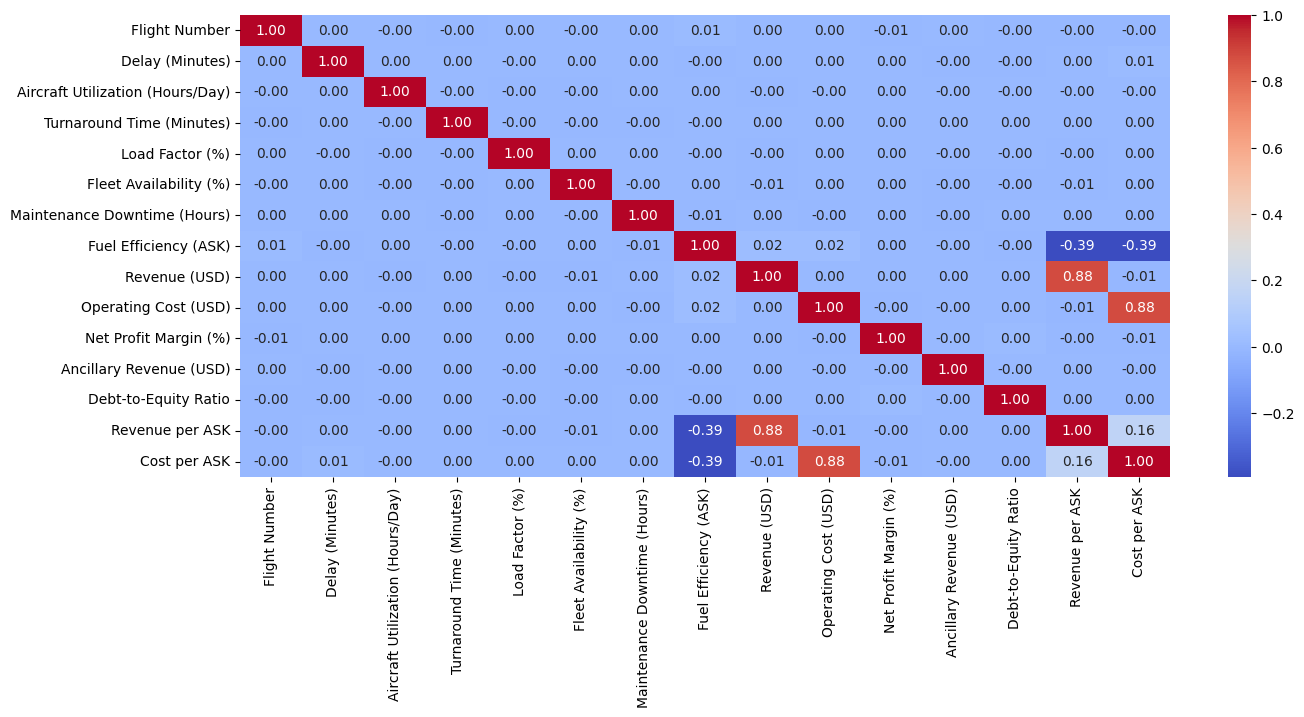

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
correlation_matrix = X_train.corr()
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap='coolwarm')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [29]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Mean R²:", cv_scores.mean())


Cross-validation R² scores: [1. 1. 1. 1. 1.]
Mean R²: 1.0


In [30]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Train the model (if not already trained)
model = LinearRegression()
model.fit(X_train, y_train)

# Get absolute coefficient values (feature importance)
feature_importance = abs(model.coef_)  # Linear Regression uses coefficients

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                             Feature    Importance
8                      Revenue (USD)  1.000000e+00
9               Operating Cost (USD)  1.000000e+00
7              Fuel Efficiency (ASK)  1.391419e-12
12              Debt-to-Equity Ratio  7.202398e-13
2   Aircraft Utilization (Hours/Day)  6.102755e-13
10             Net Profit Margin (%)  8.872172e-14
5             Fleet Availability (%)  7.608252e-14
3          Turnaround Time (Minutes)  7.158161e-14
1                    Delay (Minutes)  5.979697e-14
6       Maintenance Downtime (Hours)  5.113156e-14
4                    Load Factor (%)  2.088821e-14
0                      Flight Number  5.253850e-15
11           Ancillary Revenue (USD)  1.124949e-15
14                      Cost per ASK  8.891491e-16
13                   Revenue per ASK  3.812334e-16


C:\Users\hp\AppData\Local\Temp\ipykernel_16824\2896445960.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


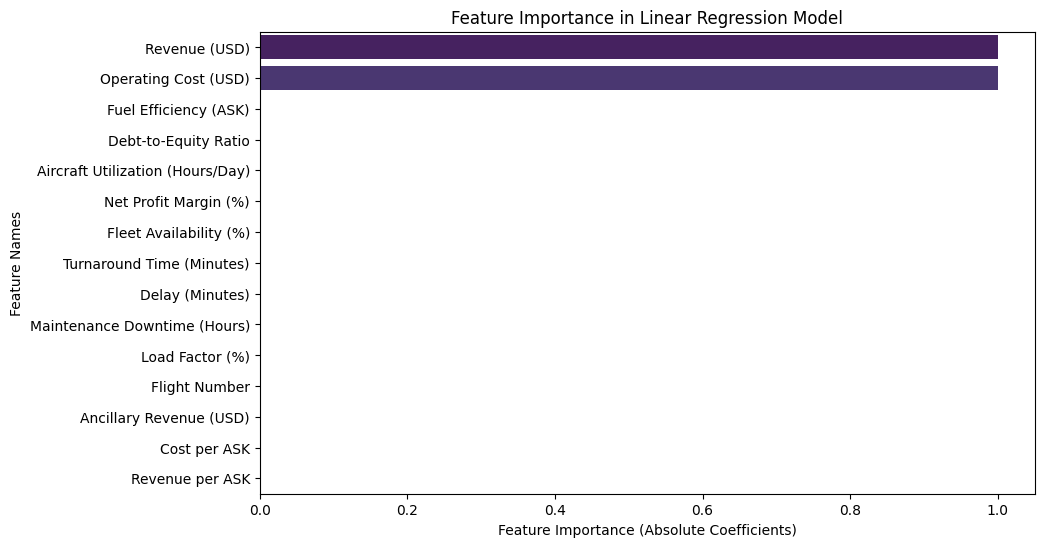

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.xlabel("Feature Importance (Absolute Coefficients)")
plt.ylabel("Feature Names")
plt.title("Feature Importance in Linear Regression Model")
plt.show()

In [32]:
import joblib

# Save the trained model
joblib.dump(model, 'airline_profit_model.pkl')


['airline_profit_model.pkl']

In [33]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np


# Load the trained model
model = joblib.load('airline_profit_model.pkl')

In [34]:
model

LinearRegression()

In [35]:
from sklearn.preprocessing import OneHotEncoder
import joblib

# Load correct categorical column names
categorical_cols = ["Flight Number"]

# Apply One-Hot Encoding
encoder = OneHotEncoder(handle_unknown="ignore")
encoded_data = encoder.fit_transform(df[categorical_cols])

# Save encoder
joblib.dump(encoder, "encoder.pkl")
print("✅ Encoder saved successfully!")

✅ Encoder saved successfully!
